Importing necessary modules

In [67]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import normalization

Importing the data and making new dataframe data_clustering

In [2]:
data = pd.read_csv("Ecommerce Customers.csv")
#print(data.head(5))

data_clustering = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]
#print(data_clustering.head(5))

Scaling the data

In [3]:
scaled = StandardScaler(data_clustering)
#print(data_clustering.head(5))

Elbow criteria

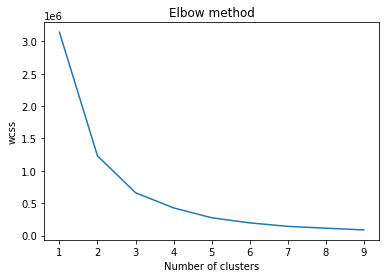

In [59]:
# wcss => within cluster sum of squares
# .inertia_ => Sum of squared distances of samples to their closest cluster center
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=20)
    km.fit(data_clustering)
    wcss.append(km.inertia_)

plt.plot(range(1,10), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

Runing the Kmeans algorithm

In [5]:
clustering = KMeans(n_clusters=5, random_state=20, max_iter=300)
data_clustering["clusters"] = clustering.fit_predict(data_clustering)

#print(data_clustering.head(10))

Dimension reduction for visualisation

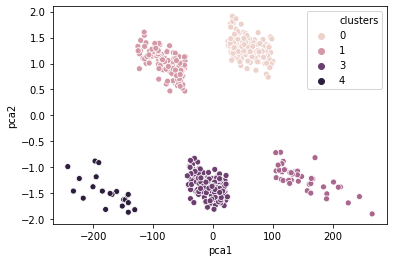

In [6]:
reduced_data = PCA(n_components= 2).fit_transform(data_clustering)
results = pd.DataFrame(reduced_data, columns= ["pca1","pca2"])

sns.scatterplot(x="pca1",y="pca2",hue=data_clustering["clusters"], data=results)
plt.show()

Finding the luster features 

In [7]:
counter = 0

cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []


for x in data_clustering["clusters"]:
    if x == 0:
        cluster_0.append(data_clustering.iloc[counter,:])
        counter += 1
    elif x == 1:
        cluster_1.append(data_clustering.iloc[counter,:])
        counter += 1
    elif x == 2:
        cluster_2.append(data_clustering.iloc[counter,:])
        counter += 1
    elif x == 3:
        cluster_3.append(data_clustering.iloc[counter,:])
        counter += 1
    elif x == 4:
        cluster_4.append(data_clustering.iloc[counter,:])
        counter += 1
    else:
        counter += 1
        pass

cluster_0 = pd.DataFrame(cluster_0)
cluster_1 = pd.DataFrame(cluster_1)
cluster_2 = pd.DataFrame(cluster_2)
cluster_3 = pd.DataFrame(cluster_3)
cluster_4 = pd.DataFrame(cluster_4)


#print(cluster_0.describe())
#print(cluster_1.describe())
#print(cluster_2.describe())
#print(cluster_3.describe())
#print(cluster_4.describe())

2-Dimensional Kmeans Visualisation

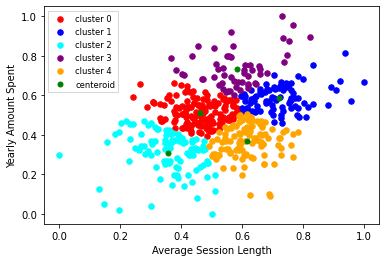

In [77]:
# Avg. Session Length (0), Yearly Amount Spent(4)

data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[0,4]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 30, c = 'red', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 30, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 30, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 30, c = 'purple', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 30, c = 'orange', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green' , label = 'centeroid', marker=".")
plt.xlabel("Average Session Length")
plt.ylabel("Yearly Amount Spent")
plt.legend(loc=2, fancybox=False, fontsize='small')
plt.show()

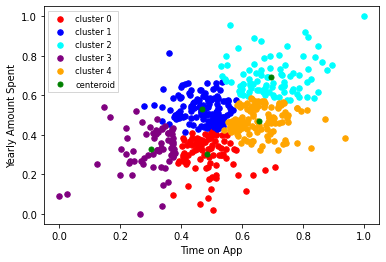

In [79]:
# Time on App (1), Yearly Amount Spent (4)


data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[1,4]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 30, c = 'red', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 30, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 30, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 30, c = 'purple', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 30, c = 'orange', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green' , label = 'centeroid', marker=".")
plt.xlabel("Time on ")
plt.ylabel("Yearly Amount Spent")
plt.legend(loc=2, fancybox=False, fontsize='small')
plt.show()

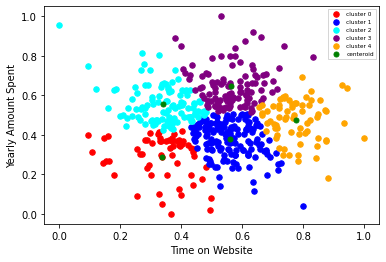

In [90]:
# 'Time on Website'(2),'Yearly Amount Spent' (4)


data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[2,4]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 30, c = 'red', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 30, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 30, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 30, c = 'purple', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 30, c = 'orange', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green' , label = 'centeroid', marker=".")
plt.xlabel("Time on Website")
plt.ylabel("Yearly Amount Spent")
plt.legend(loc=1, fancybox=False, ncol=1,fontsize='xx-small')
plt.show()

In [76]:
#Avg. Session Length(0),Length of Membership (4)


In [73]:
#Time on App (1), Length of Membership (4)

In [74]:
#"Time on Website" (2)Length of Membership (4)